# Deciding which city to move - Coursera Capstone project

This repository is used to complete the coursera ibm datascience course.

## Introducction

In this notebook I'm going to compare which city is similar to munich in the intentions to decide which city will be the appropiate to move based on similiarity of venues, things to do and its population.

The answer given by this notebook will help me in taking the decision, **Where to start looking for jobs?** and later move to that city.

The comparasion will be made between major cities of several countries. Some of them will be listed next:

- Munich <- Reference point
- Berlin
- Hamburg
- Düsseldorf
- Vienna
- Prague
- Madrid
- Barcelona
- Montreal
- Toronto
- etc.

## Data to use

For this project we will use the [foursquare api](https://foursquare.com/) to investigate which venues are each city center. 

To compare the population of each city using this dataset from simple maps [World cities population](https://simplemaps.com/data/world-cities).

To compare the cost of living in each city, for this we are going to use the [dataset](https://www.numbeo.com/cost-of-living/rankings.jsp) where we will use the the cost of living index to compare each city. For more information please look in the URL https://www.numbeo.com/cost-of-living/rankings.jsp

### Foursquare API

Foursquare API will be used to extract the point of interest of each city, like restaurants, museums, etc. They are categorized by foursquare, with the categorization it will be used to compare how is the proportion of venues in a city compared to other city. 

Here an example of the cured data from foursquare

<img src="https://github.com/alexsotocx/Coursera_Capstone/raw/main/foursquare.png"/>



### Cost of living index

From the dataset we can obtain several data but we are interested in the Cost of living index feature, It will allow us to compare each city.

Here a explanation of what each variable means:

- These indices are relative to New York City (NYC). Which means that for New York City, each index should be 100(%). If another city has, for example, rent index of 120, it means that on an average in that city rents are 20% more expensive than in New York City. If a city has rent index of 70, that means on average rent in that city is 30% less expensive than in New York City.

- Cost of Living Index (Excl. Rent) is a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index does not include accommodation expenses such as rent or mortgage. If a city has a Cost of Living Index of 120, it means Numbeo has estimated it is 20% more expensive than New York (excluding rent).

- Rent Index is an estimation of prices of renting apartments in the city compared to New York City. If Rent index is 80, Numbeo has estimated that price of rents in that city is on average 20% less than the price in New York.

- Groceries Index is an estimation of grocery prices in the city compared to New York City. To calculate this section, Numbeo uses weights of items in the "Markets" section for each city.

- Restaurants Index is a comparison of prices of meals and drinks in restaurants and bars compared to NYC.

- Cost of Living Plus Rent Index is an estimation of consumer goods prices including rent comparing to New York City.

- Local Purchasing Power shows relative purchasing power in buying goods and services in a given city for the average net salary in that city. If domestic purchasing power is 40, this means that the inhabitants of that city with an average salary can afford to buy on an average 60% less goods and services than New York City residents with an average salary.

For more information about used weights (actual formula) please visit [Motivation and Methodology page](https://www.numbeo.com/common/motivation_and_methodology.jsp).

#### Example of feature:

<img src="https://github.com/alexsotocx/Coursera_Capstone/raw/main/cost-of-living.png"/>


### World cities population

This a dataset is provided from https://simplemaps.com/data/world-cities as free distribution and they have all the rights to it, it will be used to extract the population of the cities and its geoprahical location

The population value means how many people live in the city and it's an important factor for me because I simply don't like cities with too many people.

I provided a copy of the data set I will use here https://github.com/alexsotocx/Coursera_Capstone/raw/main/world-population-simplemaps/worldcities.csv. But please visit the main website for the updated copy https://simplemaps.com/data/world-cities.

I repeat: This dataset belongs to Simplemaps and all the attributions go to them.

#### Example

<img src="https://github.com/alexsotocx/Coursera_Capstone/raw/main/cities-population.png">

### Data cleaning

Lets start by having a dataframe with the countries we are going to compare

In [139]:
import pandas as pd

selected_cities = [

  { "city": "Berlin", "country": "Germany"},
  { "city": "Hamburg", "country": "Germany"},
  { "city": "Dusseldorf", "country": "Germany"},
  { "city": "Vienna", "country": "Austria"},
  { "city": "Madrid", "country": "Spain"},
  { "city": "Barcelona", "country": "Spain"},
  { "city": "Montreal", "country": "Canada"},
  { "city": "Toronto", "country": "Canada"},
  { "city": "Ottawa", "country": "Canada"},
  { "city": "Vancouver", "country": "Canada"},
  { "city": "Amsterdam", "country": "Netherlands"},
  { "city": "San Francisco", "country": "United States"},
  { "city": "Medellin", "country": "Colombia"},
  { "city": "Zurich", "country": "Switzerland"},
  { "city": "Sydney", "country": "Australia"},
  { "city": "Wellington", "country": "New Zealand"},
  { "city": "Edinburgh", "country": "United Kingdom"},
    
]

df_cities_all = pd.read_csv('https://raw.githubusercontent.com/alexsotocx/Coursera_Capstone/main/world-population-simplemaps/worldcities.csv')
df_cities = df_cities_all[df_cities_all['city_ascii'] == 'Munich']

for city_map in selected_cities:
    city_name, country_name = [city_map['city'], city_map['country']]
    df_cities = df_cities.append(df_cities_all[(df_cities_all['city_ascii'] == city_name) & (df_cities_all['country'] == country_name)])

df_cities = df_cities.reset_index()[['city_ascii', 'lat', 'lng', 'country', 'population']]
df_cities.rename(columns={"city_ascii": "City"}, inplace=True)

In [140]:
df_cities

,City,lat,lng,country,population
0,Munich,48.1372,11.5755,Germany,1471508.0
1,Berlin,52.5167,13.3833,Germany,3644826.0
2,Hamburg,53.5500,10.0000,Germany,1841179.0
3,Dusseldorf,51.2311,6.7724,Germany,619294.0
4,Vienna,48.2083,16.3731,Austria,1840573.0
5,Madrid,40.4189,-3.6919,Spain,3266126.0
6,Barcelona,41.3825,2.1769,Spain,4588000.0
7,Montreal,45.5089,-73.5617,Canada,3519595.0
8,Toronto,43.7417,-79.3733,Canada,5429524.0
9,Ottawa,45.4247,-75.6950,Canada,989567.0


## Let's plot the cities we are going to analise

We are going to use folium map to see the world wide plot of the cities.

In [141]:
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you dont have folium installed
import folium

print('Folium Imported')

Folium Imported


In [142]:
def visualize_on_map(center_lat, center_long, df):
    latitude, longitude = [center_lat, center_long]
    generated_map = folium.Map(location=[latitude, longitude], zoom_start=2)

    # add markers to map
    for lat, lng, label in zip(df['lat'], df['lng'], df['text']):
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(generated_map)  

    return(generated_map)

In [143]:
copied = df_cities.copy()
copied['text'] = df_cities['City'] + ', ' + df_cities['country']

generated_map = visualize_on_map(0, 0, copied)
generated_map

#### Graph of the population per city

We are going to show how is the distribution of the population per city using a bar plot

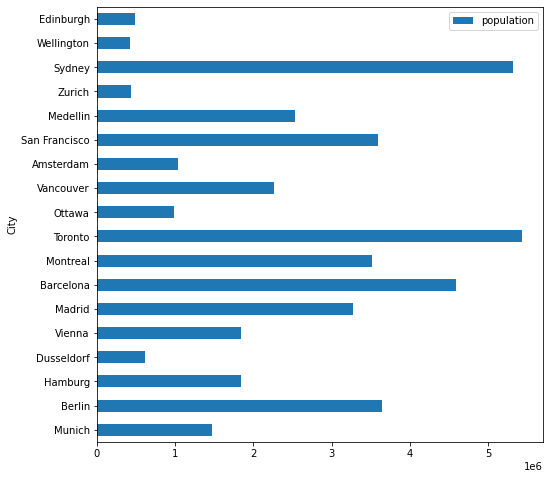

In [144]:
ax = df_cities.plot(kind='barh', x='City', y='population',xlabel='City', ylabel='Population in million of people', figsize=(8,8))


### Living index cost per city

We are going to use pandas to extract a table from html and get the data that way.

In [145]:
df_living_index_cost = pd.read_html("https://www.numbeo.com/cost-of-living/rankings.jsp", attrs={'id': 't2'})[0]

In [146]:
df_living_index_cost = df_living_index_cost[['City','Cost of Living Index', 'Rent Index', 'Local Purchasing Power Index']]

In [147]:
df_living_index_cost

,City,Cost of Living Index,Rent Index,Local Purchasing Power Index
0,"Hamilton, Bermuda",146.33,89.06,91.24
1,"Basel, Switzerland",136.65,50.09,100.65
2,"Zurich, Switzerland",135.49,70.22,117.91
3,"Lausanne, Switzerland",132.86,57.85,104.40
4,"Geneva, Switzerland",131.75,70.07,109.73
...,...,...,...,...
593,"Visakhapatnam, India",22.57,4.06,46.71
594,"Lahore, Pakistan",22.52,4.74,25.58
595,"Karachi, Pakistan",22.18,4.45,27.68
596,"Peshawar, Pakistan",21.46,2.52,21.07


In [148]:
# Select cities that we want to study
df_living_index_cost = df_living_index_cost[df_living_index_cost['City'].str.contains('|'.join(df_cities['City']))]
df_living_index_cost.reset_index(inplace=True, drop=True)
df_living_index_cost = df_living_index_cost[df_living_index_cost['City'] != 'Vancouver, WA, United States']
df_living_index_cost['City'] = df_living_index_cost['City'].apply(lambda x: x.split(',')[0])
df_living_index_cost = df_living_index_cost[df_living_index_cost['City'].isin(df_cities['City'])]

In [149]:
df_living_index_cost

,City,Cost of Living Index,Rent Index,Local Purchasing Power Index
0,Zurich,135.49,70.22,117.91
1,San Francisco,93.35,109.35,126.95
2,Sydney,89.11,62.66,96.30
3,Amsterdam,86.80,59.25,79.07
4,Munich,82.01,48.61,90.73
5,Wellington,78.47,43.79,96.54
6,Vancouver,76.22,52.09,92.47
7,Edinburgh,75.96,36.27,78.27
8,Toronto,75.69,51.24,85.21
9,Hamburg,74.46,36.67,81.95


#### Distribution of the cost of living index in city

<AxesSubplot:ylabel='City'>

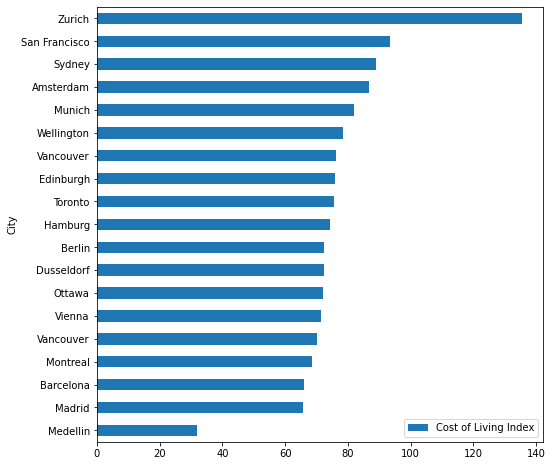

In [76]:
df_living_index_cost.sort_values(by=['Cost of Living Index']).plot(kind='barh', x='City', y='Cost of Living Index', figsize=(8,8))

#### Cost of rent per city

<AxesSubplot:ylabel='City'>

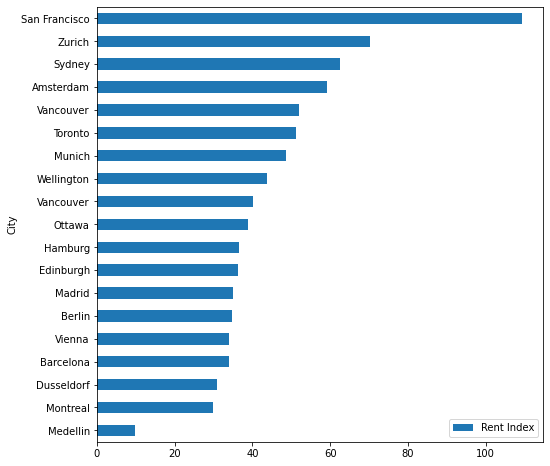

In [13]:
df_living_index_cost.sort_values(by=['Rent Index']).plot(kind='barh', x='City', y='Rent Index', figsize=(8,8))

#### Local Purchasing Power graph

<AxesSubplot:ylabel='City'>

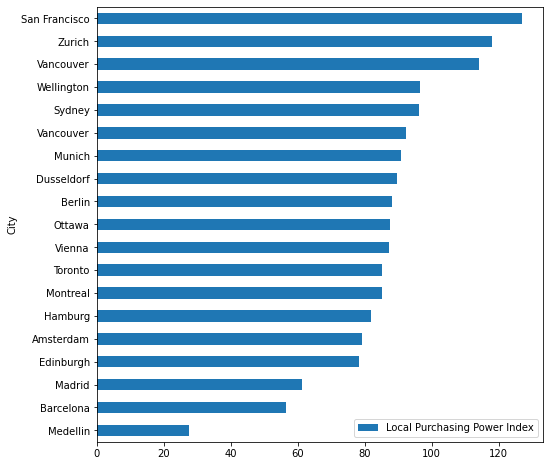

In [14]:
df_living_index_cost.sort_values(by=['Local Purchasing Power Index']).plot(kind='barh', x='City', y='Local Purchasing Power Index', figsize=(8,8))

### Foursquare data

Let's now retrieve all the data from the restaurants and venues of each city to later compare them. To retrieve it, we are going to use foursquare api.

In [15]:
import json # library to handle JSON files
import requests # library to handle requests

# Define credentials for foursquare
CLIENT_ID = 'VWCHA5FBFHE31XJSWRDVOIR00THC1IXP40DCY4G0XPDPNP3W' # your Foursquare ID
CLIENT_SECRET = 'S0EU5GN01QL4MBXIS11NSGIPZC30EDB3IKBAJTKIFSXRFPS0' # your Foursquare Secret
ACCESS_TOKEN = 'KOEFHGKD0P1W1QZZ40GQ011JKTAQM4BBDPWWXKULYDFSMJMC' # your FourSquare Access Token
VERSION = '20180605' # Foursquare API version
LIMIT = 200 # A default Foursquare API limit value

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng,ACCESS_TOKEN, VERSION, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [153]:
venues_per_city = getNearbyVenues(df_cities['City'], df_cities.lat, df_cities.lng)




Munich
Berlin
Hamburg
Dusseldorf
Vienna
Madrid
Barcelona
Montreal
Toronto
Ottawa
Vancouver
Amsterdam
San Francisco
Medellin
Zurich
Sydney
Wellington
Edinburgh


In [154]:
venues_per_city.head()

,City,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Munich,Marienplatz,48.137125,11.575483,Plaza
1,Munich,Fischbrunnen,48.137211,11.576047,Fountain
2,Munich,Alois Dallmayr,48.138469,11.577372,Gourmet Shop
3,Munich,Viktualienmarkt,48.135070,11.576456,Farmers Market
4,Munich,Chocolaterie Beluga,48.135750,11.575776,Café


In order to compare each city we need to group and see the proportion of venues of each city.

In [155]:
venues_categories_per_city = pd.get_dummies(venues_per_city[['Venue Category']], prefix="", prefix_sep="")

In [156]:
venues_categories_per_city.head()

,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
venues_categories_per_city.insert(0, 'City', venues_per_city['City'], True)

In [158]:
venues_categories_per_city.head()

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Munich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Munich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Munich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Munich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Munich,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
cities_groupped_mean = venues_categories_per_city.groupby('City').mean().reset_index()
cities_groupped_mean

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Amsterdam,0.00,0.00,0.02,0.00,0.000000,0.00,0.00,0.01,0.00,...,0.00,0.020000,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02
1,Barcelona,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.01,0.00,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.05,0.01,0.00,0.00
2,Berlin,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.02,0.00,...,0.01,0.030000,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.00
3,Dusseldorf,0.00,0.00,0.00,0.00,0.000000,0.00,0.02,0.00,0.03,...,0.00,0.000000,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.00
4,Edinburgh,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.01,0.01,...,0.00,0.020000,0.00,0.00,0.00,0.04,0.00,0.00,0.01,0.00
5,Hamburg,0.01,0.00,0.00,0.00,0.000000,0.00,0.00,0.02,0.02,...,0.00,0.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Madrid,0.00,0.01,0.00,0.00,0.000000,0.00,0.01,0.02,0.02,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01
7,Medellin,0.00,0.00,0.00,0.00,0.014706,0.00,0.00,0.00,0.00,...,0.00,0.014706,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Montreal,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.01,0.02,...,0.00,0.010000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Munich,0.00,0.00,0.00,0.00,0.000000,0.00,0.01,0.00,0.01,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00


## Merge all the data to later cluster it

In [160]:
df_living_index_cost


,City,Cost of Living Index,Rent Index,Local Purchasing Power Index
0,Zurich,135.49,70.22,117.91
1,San Francisco,93.35,109.35,126.95
2,Sydney,89.11,62.66,96.30
3,Amsterdam,86.80,59.25,79.07
4,Munich,82.01,48.61,90.73
5,Wellington,78.47,43.79,96.54
6,Vancouver,76.22,52.09,92.47
7,Edinburgh,75.96,36.27,78.27
8,Toronto,75.69,51.24,85.21
9,Hamburg,74.46,36.67,81.95


In [161]:
df_cities

,City,lat,lng,country,population
0,Munich,48.1372,11.5755,Germany,1471508.0
1,Berlin,52.5167,13.3833,Germany,3644826.0
2,Hamburg,53.5500,10.0000,Germany,1841179.0
3,Dusseldorf,51.2311,6.7724,Germany,619294.0
4,Vienna,48.2083,16.3731,Austria,1840573.0
5,Madrid,40.4189,-3.6919,Spain,3266126.0
6,Barcelona,41.3825,2.1769,Spain,4588000.0
7,Montreal,45.5089,-73.5617,Canada,3519595.0
8,Toronto,43.7417,-79.3733,Canada,5429524.0
9,Ottawa,45.4247,-75.6950,Canada,989567.0


In [162]:
cities_groupped_mean

,City,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Amsterdam,0.00,0.00,0.02,0.00,0.000000,0.00,0.00,0.01,0.00,...,0.00,0.020000,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.02
1,Barcelona,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.01,0.00,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.05,0.01,0.00,0.00
2,Berlin,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.02,0.00,...,0.01,0.030000,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.00
3,Dusseldorf,0.00,0.00,0.00,0.00,0.000000,0.00,0.02,0.00,0.03,...,0.00,0.000000,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.00
4,Edinburgh,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.01,0.01,...,0.00,0.020000,0.00,0.00,0.00,0.04,0.00,0.00,0.01,0.00
5,Hamburg,0.01,0.00,0.00,0.00,0.000000,0.00,0.00,0.02,0.02,...,0.00,0.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Madrid,0.00,0.01,0.00,0.00,0.000000,0.00,0.01,0.02,0.02,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01
7,Medellin,0.00,0.00,0.00,0.00,0.014706,0.00,0.00,0.00,0.00,...,0.00,0.014706,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Montreal,0.00,0.00,0.00,0.00,0.000000,0.00,0.00,0.01,0.02,...,0.00,0.010000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Munich,0.00,0.00,0.00,0.00,0.000000,0.00,0.01,0.00,0.01,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00


In [163]:

result = df_cities.copy().merge(df_living_index_cost, on="City").merge(cities_groupped_mean, on="City")

In [164]:
result

,City,lat,lng,country,population,Cost of Living Index,Rent Index,Local Purchasing Power Index,Accessories Store,Adult Boutique,...,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Munich,48.1372,11.5755,Germany,1471508.0,82.01,48.61,90.73,0.00,0.00,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00
1,Berlin,52.5167,13.3833,Germany,3644826.0,72.52,34.86,88.21,0.00,0.00,...,0.01,0.030000,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.00
2,Hamburg,53.5500,10.0000,Germany,1841179.0,74.46,36.67,81.95,0.01,0.00,...,0.00,0.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Dusseldorf,51.2311,6.7724,Germany,619294.0,72.35,30.93,89.78,0.00,0.00,...,0.00,0.000000,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.00
4,Vienna,48.2083,16.3731,Austria,1840573.0,71.31,34.11,87.36,0.00,0.00,...,0.00,0.000000,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00
5,Madrid,40.4189,-3.6919,Spain,3266126.0,65.71,34.91,61.15,0.00,0.01,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01
6,Barcelona,41.3825,2.1769,Spain,4588000.0,66.18,33.92,56.46,0.00,0.00,...,0.00,0.010000,0.00,0.00,0.00,0.00,0.05,0.01,0.00,0.00
7,Montreal,45.5089,-73.5617,Canada,3519595.0,68.65,29.87,85.11,0.00,0.00,...,0.00,0.010000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,Toronto,43.7417,-79.3733,Canada,5429524.0,75.69,51.24,85.21,0.00,0.00,...,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Ottawa,45.4247,-75.6950,Canada,989567.0,72.15,38.87,87.41,0.00,0.00,...,0.00,0.000000,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00


### Kluster cities by all features

In [165]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [166]:
features = result.drop(['City', 'lat', 'lng', 'country'], 1)
features.head()

,population,Cost of Living Index,Rent Index,Local Purchasing Power Index,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Antique Shop,...,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Watch Shop,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,1471508.0,82.01,48.61,90.73,0.00,0.0,0.0,0.0,0.0,0.00,...,0.00,0.01,0.00,0.0,0.00,0.0,0.01,0.01,0.0,0.0
1,3644826.0,72.52,34.86,88.21,0.00,0.0,0.0,0.0,0.0,0.00,...,0.01,0.03,0.00,0.0,0.01,0.0,0.03,0.00,0.0,0.0
2,1841179.0,74.46,36.67,81.95,0.01,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.03,0.0,0.00,0.0,0.00,0.00,0.0,0.0
3,619294.0,72.35,30.93,89.78,0.00,0.0,0.0,0.0,0.0,0.00,...,0.00,0.00,0.01,0.0,0.00,0.0,0.02,0.00,0.0,0.0
4,1840573.0,71.31,34.11,87.36,0.00,0.0,0.0,0.0,0.0,0.01,...,0.00,0.00,0.00,0.0,0.00,0.0,0.02,0.00,0.0,0.0


In [167]:
# Normalize data

from sklearn.preprocessing import StandardScaler

stand_feautres = StandardScaler().fit_transform(features)
stand_feautres

array([[-0.57477663,  0.25863079,  0.15459673, ...,  2.23606798,
        -0.24253563, -0.47087096],
       [ 0.76415722, -0.24386365, -0.51095713, ..., -0.4472136 ,
        -0.24253563, -0.47087096],
       [-0.34703038, -0.14114087, -0.42334604, ..., -0.4472136 ,
        -0.24253563, -0.47087096],
       ...,
       [ 1.7913672 ,  0.634575  ,  0.83467177, ..., -0.4472136 ,
        -0.24253563, -0.47087096],
       [-1.2235119 ,  0.07118818, -0.07871015, ..., -0.4472136 ,
        -0.24253563, -0.47087096],
       [-1.18066366, -0.06171604, -0.4427076 , ..., -0.4472136 ,
         4.12310563, -0.47087096]])

In [168]:
# set number of clusters
kclusters = 6

cities_kluster = stand_feautres
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_kluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1], dtype=int32)

In [169]:
# Assign each label to the groups
result.insert(0, 'Cluster Labels', kmeans.labels_)

In [170]:
result[['Cluster Labels', 'City', 'lat', 'lng']]

,Cluster Labels,City,lat,lng
0,1,Munich,48.1372,11.5755
1,1,Berlin,52.5167,13.3833
2,1,Hamburg,53.5500,10.0000
3,1,Dusseldorf,51.2311,6.7724
4,3,Vienna,48.2083,16.3731
5,1,Madrid,40.4189,-3.6919
6,1,Barcelona,41.3825,2.1769
7,1,Montreal,45.5089,-73.5617
8,1,Toronto,43.7417,-79.3733
9,1,Ottawa,45.4247,-75.6950


In [171]:
import numpy as np
map_clusters = folium.Map(location=[0, 0], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(result['lat'], result['lng'], result['City'], result['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [177]:
munich_cluster = result[result['City'] == 'Munich']['Cluster Labels'].values[0]

### Conclusion

Cities similar to munich based on the features

In [188]:
result[result['Cluster Labels'] == munich_cluster][['City', 'country']]

,City,country
0,Munich,Germany
1,Berlin,Germany
2,Hamburg,Germany
3,Dusseldorf,Germany
5,Madrid,Spain
6,Barcelona,Spain
7,Montreal,Canada
8,Toronto,Canada
9,Ottawa,Canada
11,Amsterdam,Netherlands
